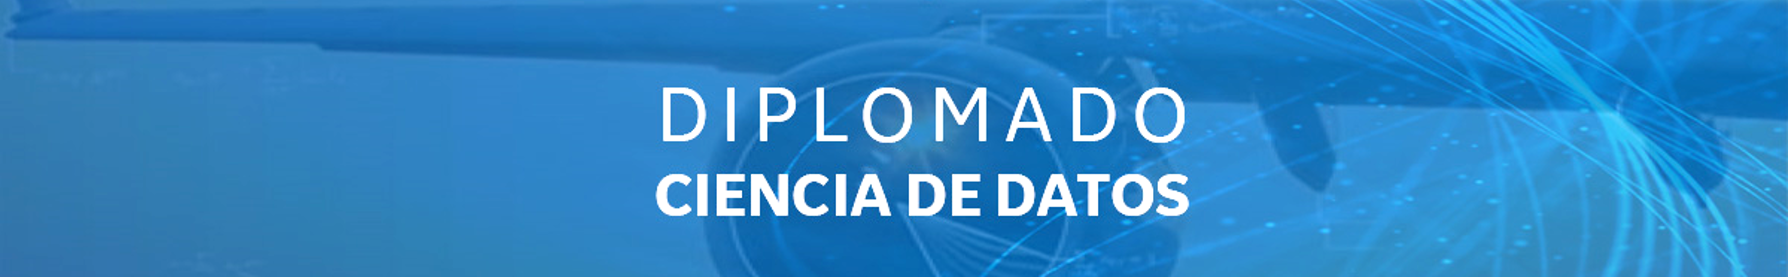

***
## Instrucciones
* Lee con cuidado todas las celdas y córrelas.
* Completa el código o responde las preguntas en las celdas dónde se indica.
* Al finalizar de completar y correr todo el notebook guárdalo y súbelo a la tarea. (.ipynb o .pdf)
* Te recomendamos hacer modificaciones al código y pruebas para que conozcas mejor la sintaxis

No hemos utilizado la librería `xlrd` hasta ahora. Sirve para cargar archivos excel en pandas. Tal vez la tengas que instalar con el comando siguiente:

In [2]:
# !pip install xlrd
# !pip install statsmodels

# Pruebas de hipótesis

Las pruebas de hipótesis son una herramienta esencial para los científicos de datos. A menudo el problema al que nos enfrentamos no es tanto la estimación de un parámetro de la población, sino la formación de un procedimiento de decisión que se base en datos y que pueda producir una conclusión.

Por ejemplo, un investigador médico podría decidir con base en evidencia experimental si beber café incrementa el riesgo de cáncer en los seres humanos. O un ingeniero podría decidir con base en datos muestrales si hay una diferencia entre la precisión de un tipo de medidor y otro. Tal vez un científico de datos quiera conocer si los clientes que visitan cierta tienda compran más cierto mes del año. En todos estos casos se postulan hipótesis acerca de un sistema. En cada uno de estos casos podríamos utilizar datos experimentales y tomar decisiones basadas en ellos. 

Una **hipótesis estadística** es una aseveración o conjetura que hacemos respecto a una o más poblaciones. La verdad o falsedad de dicha hipótesis estadística nunca se sabe con absoluta certeza, a menos que se examine toda la población, lo cual sería poco práctico o imposible en la mayoría de las situaciones. 

La estadística y las pruebas de hipótesis nos son de utilidad cuando tenemos una decisión que tomar bajo incertidumbre. El punto clave es la incertidumbre, tenemos que aceptar que no vamos a conocer o a saber con 100% de seguridad si una hipótesis es falsa o verdadera. (Consulta [éste](https://towardsdatascience.com/whats-the-point-of-statistics-8163635da56c) enlace para leer una opinión sobre cuál es el punto de la estadística y para qué la necesitamos)

Al no poder conocer la población completa tenemos que trabajar con muestras aleatorias de la población de interés. Y en una prueba de hipótesis usaremos los datos contenidos en la muestra para proporcionar evidencia que respalde o no la hipótesis. La evidencia de la muestra que es inconsistente con la hipótesis planteada conduce al rechazo de esta.

Como ya hemos visto la base de la prueba de hipótesis son:

Hipótesis nula: $H_0$
Hipótesis alternativa: $H_1$ o $H_a$.

En este notebook veremos algunos ejemplos de pruebas de hipótesis y también veremos cómo calcular valores p, valores z y otras funciones útiles de la librería `statsmodels` de Python.


In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline
from statsmodels.stats.weightstats import ztest

### Prueba Z
Esta prueba es indicada si conocemos la desviación estándar de la población.

#### Prueba z de una muestra
* Nos sirve para checar si la media de la población es significativamente diferente de la media de la muestra o no.
* $H_0$ gneralmente es "no hay diferencia" $H_1"$ es "hay una diferencia significativa"
* El valor p debe ser menor a 0.05 (5%) para aceptar la hipótesis alternativa.

$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$
* $\bar{x}$ - media de la muestra
* $\mu$ - media poblacional
* $\sigma$ - desviación estándar poblacional
* $n$ - número de observaciones en la muestra

Los datos de `train.csv` tienen información sobre ventas. La columna que nos interesa es `SalePrice`. En esa columna vienen los precios de venta de varios productos. En este ejemplo tomamos una muestra aleatoria de la población de precios `pop_price` y luego hacemos una prueba de hipótesis para ver si la media de la muestra es diferente a la media de la población.

Dado que la muestra es aleatoria lo más probable es que la media de las 1,000 observaciones que estamos tomando sea bastante parecida a la de la población pero hay una pequeña probabilidad de que esto no sea así. 

Nuestra $H_0$ en este caso es: **No hay diferencia entre la media de precios poblacional y muestral**

Lo que hace que la $H_1$ sea: **Hay diferencia entre la media de precios poblacional y muestral**

_Lee con atención el siguiente código. Si necesitas puedes dividirlo en varias celdas para entender cada paso_

In [4]:
df = pd.read_csv("train.csv")
# guardamos el precio de la población en pop_price, el precio de la población
pop_price = df.SalePrice
# tomamos una muestra de 1000 observaciones aleatorias de precios
sample_price = df.sample(1000).SalePrice

# Nuestra H0 es NO hay diferencia en los precios promedio de la muestra y de la población
zstat = (sample_price.mean() - pop_price.mean())/(pop_price.std()/math.sqrt(len(sample_price)))
pvalue = 2*(stats.norm.cdf(-abs(zstat)))

print("Valor Z:",zstat)
print("pvalue", pvalue)

if pvalue < 0.05:
    print("Rechazamos la hipótesis nula")
else:
    print("Aceptamos la hipótesis nula")
    

Valor Z: -0.01307260097779721
pvalue 0.9895698705836294
Aceptamos la hipótesis nula


`statsmodels` tiene la función para hacer una prueba z aquí la [documentación](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html) veamos el ejemplo

In [5]:
zstat, pvalue = ztest(sample_price, value=pop_price.mean())
print("Valor Z:", zstat)
print("Valor p:", pvalue)

Valor Z: -0.013627584758832675
Valor p: 0.9891270970573366


In [6]:
zstat, pvalue = ztest(sample_price, value=pop_price.mean(), ddof=len(sample_price)-1)
print("Valor Z:", zstat)
print("Valor p:", pvalue)

Valor Z: -0.0004311577012213641
Valor p: 0.9996559859375828


El valor Z es ligeramente distinto porque utiliza la desviación estándar de la muestra asumiendo que la muestra es suficientemente grande.

## [Prueba t de Student](https://www.britannica.com/science/Students-t-test)
Esta prueba es indicada si la muestra es menor a 30 (Es un número que en los libros generalmente se da por sentado, más adelante veremos algunas razones de por qué es así).

### Prueba t de una muestra
* Nos sirve cuando **no** tenemos la varianza poblacional.
* Nos sirve para checar si la media de la población es significativamente diferente de la media de la muestra o no.
* $H_0$ gneralmente es "no hay diferencia" $H_1"$ es "hay una diferencia significativa"
* El valor p debe ser menor a 0.05 (5%) para aceptar la hipótesis alternativa.
* Usaremos la librería `scipy.stats.ttest_1samp()`. 

$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$

* $\bar{x}$ - media de la muestra
* $\mu$ - media poblacional
* $s$ - desviación estándar de la muestra
* $n$ - número de observaciones en la muestra



In [7]:
df = pd.read_csv("train.csv")
# guardamos el precio de la población en pop_price, el precio de la población
pop_price = df.SalePrice
# tomamos una muestra de 30 observaciones aleatorias de precios
sample_price = df.sample(30).SalePrice

# Nuestra H0 es NO hay diferencia en los precios promedio de la muestra y de la población
H0 = "No hay diferencia entre la media muestral y la media poblacional."
tstat = (sample_price.mean() - pop_price.mean())/(sample_price.std()/math.sqrt(len(sample_price)))

# La distribución t es adecuada para pocas muestras porque penaliza las colas
# cuando hay pocas observaciones. Es por eso que para obtener el valor p
# necesitamos pasarle los grados de libertad que corresponden al número de muestras-1
dof = len(sample_price) - 1
pvalue = 2*stats.t.cdf(-abs(tstat), df=dof)
print("Estadístico de la prueba t:", tstat)
print("Valor p", pvalue)



Estadístico de la prueba t: -3.0761527858385302
Valor p 0.004543413169839439


Utilicemos la función `ttest_1samp` de scipy.

Extracto de la documentación de `ttest_1samp(a, popmean, alternative='two-sided')`
>Calculate the T-test for the mean of ONE group of scores.

>This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

[Link a documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

In [8]:
# Ahora calculemos los mismos estadísticos pero con la librería scipy en una sola línea
tstat, pvalue = stats.ttest_1samp(sample_price, popmean=pop_price.mean())

print("\nCon scipy: ")
# \n en print se usa para salto de línea
print(f"Tstat: {tstat}\nPvalue: {pvalue}")
if pvalue < 0.05:
    print("Rechazamos la hipótesis nula")
    print(f"H0: {H0}")
else:
    
    print("Aceptamos la hipótesis nula")
    print(f"H0: {H0}")


Con scipy: 
Tstat: -3.0761527858385302
Pvalue: 0.004543413169839439
Rechazamos la hipótesis nula
H0: No hay diferencia entre la media muestral y la media poblacional.



Grafiquemos la muestra y la población para visualizar los datos que acabamos de probar. Utilizaremos un tipo de gráfica que se llama Kernel Density Estimation (kde). Sirve para aproximar la distribución de los datos que tenemos. [KDE](https://www.statsmodels.org/dev/examples/notebooks/generated/kernel_density.html#:~:text=Kernel%20density%20estimation%20is%20the,function%20on%20every%20data%20point.)

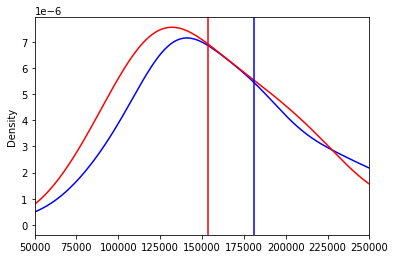

In [9]:
# Gráfica kde de la población (azúl) y la muestra (rojo)
# Las líneas verticales corresponden a las medias.
pop_price.plot(kind='kde', xlim=(50000, 250000), color='blue')
plt.axvline(sample_price.mean(), color='red')
sample_price.plot(kind='kde', color='red')
plt.axvline(pop_price.mean(), color='blue')


## Prueba t de dos muestras
La prueba t cuando tenemos dos muestras se expresa de la siguiente manera.
$$\frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{S_1^2}{n_1}+\frac{S_2^2}{n_2}}}$$
Donde:
* $\mu_1 - \mu_2$: Diferencia entre las medias poblacionales
* $\bar{x}_1 - \bar{x}_2$: Diferencia entre las medias muestrales
* $S_1, S_2$: Desviaciones estándar de las muestras
* $n_1, n_2$: Tamaño de las muestras

La prueba de dos muestras nos puede servir para:
* Revisar si hay alguna relación o asociación entre dos grupos independientes.
* Aquí $H_0$ normalmente es "No hay diferencia" (existe una asociación) y $H_1$ es "hay una diferencia significativa".

Usaremos `scipy.stats.ttest_ind(muestra1, muestra2)`

Estadístico de prueba:  0.9734897860388217
Valor p:  0.004543413169839439


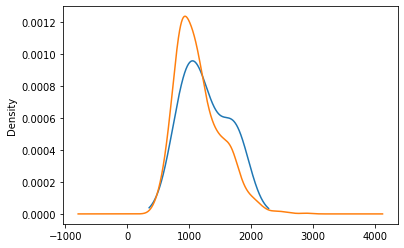

In [10]:
ventas_piso1 = df['1stFlrSF'].sample(10)
ventas_piso2 = df['1stFlrSF'].sample(1000)

ventas_piso1.plot(kind='kde')
ventas_piso2.plot(kind='kde')

ttest, pval = stats.ttest_ind(ventas_piso1, ventas_piso2)
print("Estadístico de prueba: ",ttest)
print("Valor p: ", pvalue)

---
# Ejercicio:



### Paso 1: Cargar y explorar los datos
#### Instrucciones:
Los datos payroll_2015 son datos de salarios históricos que tenemos guardados en una organización. Supongamos que se levanta una muestra aleatoria en 2016. Los datos de 2016 están contenidos en payroll_2016_sample.xlsx. Queremos utilizar estos datos para establecer una hipótesis sobre el salario promedio de 2015 vs el salario promedio en 2016.

1. Muestra qué columnas hay en payroll_2015 y payroll_2016_sample
2. ¿Cuáles son las columnas que vamos a analizar?
3. Obtén estadísticas descriptivas de los dos dataframes. Imprime al menos la media, mediana y percentiles 25, 75, min, max, std y número de muestras. Puedes usar la función describe, numpy o alguna otra librería.
4. Grafica las distribuciones de la columna que nos interesa (el salario anual) con histogramas. Puedes usar seaborn (`sns.histplot(data.columna)`) , pandas `dataframe.columna.plot(kind='hist')` o alguna otra función.

In [12]:
# !pip install openpyxl

In [13]:
# leer los datos. El archivo payroll_2015.xlsx y payroll_2016_sample.xlsx deben estar
# en la misma carpeta que el jupyter notebook.

payroll_2015 = pd.read_excel("payroll_2015.xlsx")
payroll_2016_sample = pd.read_excel("payroll_2016_sample.xlsx")

In [18]:
# 1. mostrar las columnas
print(payroll_2015.columns)
print(payroll_2016_sample.columns)
# 2. Imprimir estadísticas descriptivas
print(payroll_2015.describe())
print(payroll_2016_sample.describe())

Index(['Record Number', 'Year', 'Annual_sal', 'Job_title'], dtype='object')
Index(['Record Number', 'Year', 'Annual_sal', 'Job_title'], dtype='object')
          Year     Annual_sal
count  48687.0   48687.000000
mean    2015.0   76046.391525
std        0.0   34232.254897
min     2015.0       0.000000
25%     2015.0   49322.210000
50%     2015.0   74583.360000
75%     2015.0   97551.360000
max     2015.0  360743.760000
       Record Number    Year     Annual_sal
count   8.947000e+03  8947.0    8947.000000
mean    2.154722e+09  2016.0   78974.935500
std     1.241793e+09     0.0   33787.287521
min     2.109290e+05  2016.0       0.000000
25%     1.076460e+09  2016.0   53368.905000
50%     2.147601e+09  2016.0   77453.610000
75%     3.245927e+09  2016.0  100111.380000
max     4.294940e+09  2016.0  319986.000000


<AxesSubplot:xlabel='Annual_sal', ylabel='Count'>

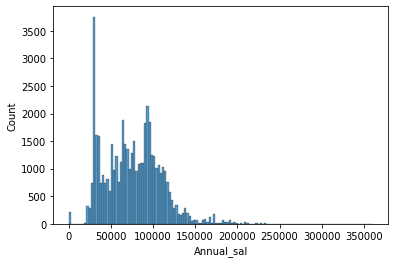

In [19]:
# 3. Crear gráficas
sns.histplot(payroll_2015.Annual_sal)

<AxesSubplot:xlabel='Annual_sal', ylabel='Count'>

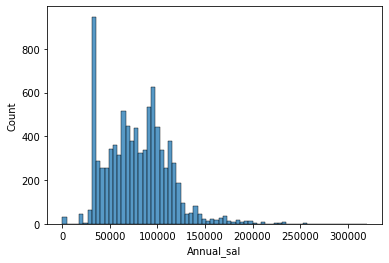

In [20]:
sns.histplot(payroll_2016_sample.Annual_sal)

### Paso 2: 
Tenemos la sospecha de que los sueldos debieron haber aumentado pero no sabemos con seguridad. Queremos saber si la paga incrementó en 2016. 
1. Plantea la hipótesis nula $H_0$
2. Plantea la hipótesis alternativa $H_1$
3. Determina los parámetros necesarios para realizar una prueba t. Ya los deberías tener calculados.

* $\bar{x}$ - media de la muestra
* $\mu$ - media poblacional
* $s$ - desviación estándar de la muestra
* $n$ - número de observaciones en la muestra

4. Realiza la prueba t para aceptar o rechazar la hipótesis nula. Utiliza como base el ejemplo que hicimos anteriormente.

#### **Tips**
* Recuerda que hay 2 tipos de pruebas de hipótesis: una cola y dos colas
* Revisa con cuidado los parámetros que recibe [scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) escoge el parámetro `alternative` correcto.

In [35]:
# Respuestas por aquí
h0 = "La paga de 2016 no es mayor a la de 2015"      # 1
h1 = "La paga de 2016 es mayor a la de 2015"         # 2

# 3
pop_mean = payroll_2015.Annual_sal.mean()
sample_mean = payroll_2016_sample.Annual_sal.mean()
pop_std = payroll_2015.Annual_sal.std()
sample_std = payroll_2016_sample.Annual_sal.std()

# 4
# zstat, pvalue = ztest(sample_price, value=pop_price.mean())
tstat, pvalue = stats.ttest_1samp(payroll_2016_sample.Annual_sal, pop_mean, alternative='greater')


8.19855172341384 1.3844826631994758e-16


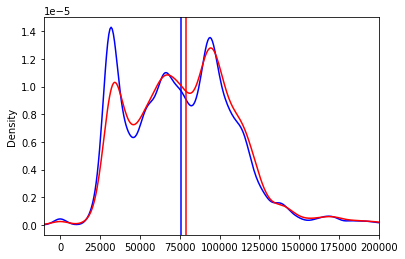

In [36]:
payroll_2015.Annual_sal.plot(kind='kde', xlim=(-10000, 200000), color='blue')
plt.axvline(pop_mean, color='blue')
payroll_2016_sample.Annual_sal.plot(kind='kde', color='red')
plt.axvline(sample_mean, color='red')

print(tstat, pvalue)

In [37]:
if pvalue < 0.05:
    print("Rechazamos h0 por tanto", h1)
else:
    print("No rechazamos h0 por tanto", h0)

Rechazamos h0 por tanto La paga de 2016 es mayor a la de 2015
